
# Project: FBI Gun Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

   > This project will educate us about trends of gun purchases in United States. The data is provided by FBI's NICS (National Instant Criminal Background Check System). The dataset has records from Novemeber 1998 to Septemver 2009. It desribes rules and regulation on who can buy guns legally and licensed merchants have to fullfill these contstraints while selling a gun to their customers. The licensed shopowners use this database to check if the person buying a gun have any criminal records. Another dataset US Census data will be used with NCIS to focus on statewise purchase of several kinds of firearms.                                        
    > In specific the report will discuss about:                 
        >• What are the trends in gun checks among all states in the decade of 2000 to 2010?            
        >• What are the Top 10 states with the highest number of firearm background checks per capita for 2010?                                                     
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')


<a id='wrangling'></a>
## Data Wrangling

   > In this section of the report, the dataset will be checked for cleanliness, structure adn unused column will be dropped. At the end of this step dataset will be ready for analysis. 


# General Properties

## Gun dataset

In [2]:
#import gun data 
gun = pd.read_excel('gun_data.xlsx')
gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [3]:
# checking summary of the dataset
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [4]:
# Checking statistical summary
gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [5]:
# duplicates check
gun[gun.duplicated()]

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals


In [6]:
gun.duplicated().sum()

0

**Above results show no duplicate records found in the dataset**                         
**Gun dataset looks clean for most part. Several small issuses that can be addressed are:**             
   > • fixing datatype of the month column                                                  
   > • Dealing with null values

## Census dataset

In [7]:
census = pd.read_csv('U.S. Census Data.csv')
census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [8]:
# structure of dataframe(df)
census.shape

(85, 52)

In [9]:
# looking at the summary
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [10]:
# duplicates check
census[census.duplicated()]

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
census.duplicated().sum()

3

**From the duplicate result, we can delete those records as they are negligible and all values are NaN**                            
**Census dataset needs more cleaning than gun also it needs to be transposed first. The process of data cleaning is as follow:**
   > • 'Fact Note' is an unimportanat column so it is not included in analysis                                      
   > •  Row 65 onwards have informative data which can't be used for analysis                                     
   > •  Column names will be changed for easy grasping.                     
   > •  At the end of this step, we will only have those columns needed for analysis 

# Data Cleaning

## Census Dataset

In [12]:
#del dup_census

In [13]:
# making a censuse copy
dup_census = census.copy()

In [14]:
dup_census

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# deleting rows from 65 onwards using iloc
dup_census = dup_census.iloc[:65,:]

In [16]:
# deleting 'Fact note'
dup_census = dup_census.drop(columns=['Fact Note'])

In [17]:
# checking updated rows
dup_census.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [18]:
# transpose dataset 
dup_census = dup_census.transpose()

In [19]:
# checking transpose dataset top
dup_census.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""


In [20]:
# setting column names as 0th index 
dup_census.rename(columns=dup_census.iloc[0],inplace=True)
dup_census.drop(dup_census.index[0], inplace=True) # deleting 0th row as not needed anymore

In [21]:
# last step verifying columns are set properly
dup_census.columns

Index(['Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V20

In [22]:
# taking a look at the makeover of census data
dup_census

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""
Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,10.90%,...,"547,352","284,554","194,508","85,849","442,365","51,722","469,524",48.5,"103,641.89","""08"""
Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,14.20%,...,"326,693","187,845","106,678","56,113","259,614","31,056","281,182",738.1,"4,842.36","""09"""
Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,14.40%,...,"73,418","38,328","23,964","14,440","54,782","7,206","60,318",460.8,"1,948.54","""10"""
Florida,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,17.30%,...,"2,100,187","1,084,885","807,817","926,112","1,121,749","185,756","1,846,686",350.6,"53,624.76","""12"""
Georgia,"10,310,371","9,688,680",6.40%,"9,687,653",6.40%,7.10%,24.40%,25.70%,13.10%,10.70%,...,"929,864","480,578","376,506","371,588","538,893","96,787","800,585",168.4,"57,513.49","""13"""


In [23]:
dup_census[dup_census['Veterans, 2011-2015'].isna()]

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code


In [24]:
# Run the below cell only if you messed up with data_census.

In [25]:
#del data_census

In [26]:
# only keeping columns that are going to be used in data analysis
# fixing column names by removing special characters and renaming it with  meaningful names
data_census = dup_census[['Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V2016)',
       'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
       'Two or More Races, percent, July 1, 2016,  (V2016)',
       'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
       'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)',
       'Veterans, 2011-2015', 'Foreign born persons, percent, 2011-2015',
       'Language other than English spoken at home, percent of persons age 5 years+, 2011-2015',
       'High school graduate or higher, percent of persons age 25 years+, 2011-2015',
       "Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015",
       'With a disability, under age 65 years, percent, 2011-2015',
       'Persons  without health insurance, under age 65 years, percent',
       'Median household income (in 2015 dollars), 2011-2015',
       'Per capita income in past 12 months (in 2015 dollars), 2011-2015',
       'Persons in poverty, percent']]

data_census.columns = ['Population_2016',
                      'Population_2010',
                     'Pop_prcnt_chgn_2010_to_2016',
                     'Actual_Population_2010',
                     'under_5yrs_2016',
                     'under_5yrs_2010',
                     'under_18yrs_2016',
                     'under_18yrs_2010',
                     'over_65_yrs_2016',
                     'over_65_yrs_2010',
                     'white_2016',
                     'black_african_2016',
                     'american_indian_2016',
                     'asian_2016',
                     'Native Hawaiian_2016',
                     'MultiRaces_2016',
                     'Latino_2016',
                     'White_not_Latino_2016',
                     'Veterans_2011-2015',
                     'Foreign_born_persons_2011-2015',
                     'DifferentLanguage_spoken_at_home_2011-2015',
                     'High_school_or_more_age_25+_2011-2015',
                     "Undergrad_or_higher_age_25+_2011-2015",
                     'Disabled_under_age_65_2011-2015',
                     'People_without_health_insurance_under_age_65',
                     'Median_household_income_2011-2015',
                     'Per_capita_income_past_12_months_2011-2015',
                     'People_in_poverty'
                     ]

In [27]:
data_census[data_census['Veterans_2011-2015'].isna()]

,Population_2016,Population_2010,Pop_prcnt_chgn_2010_to_2016,Actual_Population_2010,under_5yrs_2016,under_5yrs_2010,under_18yrs_2016,under_18yrs_2010,over_65_yrs_2016,over_65_yrs_2010,...,Veterans_2011-2015,Foreign_born_persons_2011-2015,DifferentLanguage_spoken_at_home_2011-2015,High_school_or_more_age_25+_2011-2015,Undergrad_or_higher_age_25+_2011-2015,Disabled_under_age_65_2011-2015,People_without_health_insurance_under_age_65,Median_household_income_2011-2015,Per_capita_income_past_12_months_2011-2015,People_in_poverty


In [28]:
data_census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 28 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Population_2016                               50 non-null     object
 1   Population_2010                               50 non-null     object
 2   Pop_prcnt_chgn_2010_to_2016                   50 non-null     object
 3   Actual_Population_2010                        50 non-null     object
 4   under_5yrs_2016                               50 non-null     object
 5   under_5yrs_2010                               50 non-null     object
 6   under_18yrs_2016                              50 non-null     object
 7   under_18yrs_2010                              50 non-null     object
 8   over_65_yrs_2016                              50 non-null     object
 9   over_65_yrs_2010                              50 non-null     object
 10

In [29]:
data_census.head()

,Population_2016,Population_2010,Pop_prcnt_chgn_2010_to_2016,Actual_Population_2010,under_5yrs_2016,under_5yrs_2010,under_18yrs_2016,under_18yrs_2010,over_65_yrs_2016,over_65_yrs_2010,...,Veterans_2011-2015,Foreign_born_persons_2011-2015,DifferentLanguage_spoken_at_home_2011-2015,High_school_or_more_age_25+_2011-2015,Undergrad_or_higher_age_25+_2011-2015,Disabled_under_age_65_2011-2015,People_without_health_insurance_under_age_65,Median_household_income_2011-2015,Per_capita_income_past_12_months_2011-2015,People_in_poverty
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"363,170",3.50%,5.20%,84.30%,23.50%,11.80%,10.70%,"$43,623","$24,091",17.10%
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"69,323",7.40%,16.20%,92.10%,28.00%,8.10%,15.50%,"$72,515","$33,413",9.90%
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"505,794",13.50%,26.90%,86.00%,27.50%,8.20%,11.90%,"$50,255","$25,848",16.40%
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"220,953",4.70%,7.20%,84.80%,21.10%,12.30%,9.30%,"$41,371","$22,798",17.20%
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"1,777,410",27.00%,43.90%,81.80%,31.40%,6.80%,8.30%,"$61,818","$30,318",14.30%


## **Beofre proceeding to convert dataype of the columns, they are categorized for easy understanding.**
### It is helpful segmenting columns for easy datatype conversion
   > **percent_cols** = ['Pop_prcnt_chgn_2010_to_2016',
                     'under_5yrs_2016',
                     'under_5yrs_2010',
                     'under_18yrs_2016',
                     'under_18yrs_2010',
                     'over_65_yrs_2016',
                     'over_65_yrs_2010',
                     'white_2016',
                     'black_african_2016',
                     'american_indian_2016',
                     'asian_2016',
                     'Native Hawaiian_2016',
                     'MultiRaces_2016',
                     'Latino_2016',
                     'White_not_Latino_2016',
                     'Foreign_born_persons_2011-2015',
                     'DifferentLanguage_spoken_home_2011-2015',
                     'High_school_or_higherage_25+_2011-2015',
                     'Undergrad_or_higher_2011-2015',
                     'Disabled_under_age_65_2011-2015',
                     'People_without_health_insurance_under_age_65',
                     'People_in_poverty']
                     
                     
   > **integer_cols** = ['Population_2016',
                        'Population_2010',
                        'Actual_Population_2010',
                        'Veterans_2011_2015',
                        'Median_household_income_2011-2015',
                        'Per_capita_income_past_12_months_2011-2015']
                        
                        


**Using pd.to_numeric for datatype conversion produced NaN values in several columns. This states that the numbers are treated as string (found in the documentation). Due to this, a closer look at the value of columns was needed.                               
On doing so, it was found there are some columns with numbers containg commas, dollar sign,percent sign. So we need to remove these to have a errorfree datatype conversion.**

In [30]:
#pd.to_numeric(data_census['Population_2016'],errors='coerce')

In [31]:
data_census['Population_2016']

Alabama            4,863,300
Alaska               741,894
Arizona            6,931,071
Arkansas           2,988,248
California        39,250,017
Colorado           5,540,545
Connecticut        3,576,452
Delaware             952,065
Florida           20,612,439
Georgia           10,310,371
Hawaii             1,428,557
Idaho              1,683,140
Illinois          12,801,539
Indiana            6,633,053
Iowa               3,134,693
Kansas             2,907,289
Kentucky           4,436,974
Louisiana          4,681,666
Maine              1,331,479
Maryland           6,016,447
Massachusetts      6,811,779
Michigan           9,928,300
Minnesota          5,519,952
Mississippi        2,988,726
Missouri           6,093,000
Montana            1,042,520
Nebraska           1,907,116
Nevada             2,940,058
New Hampshire      1,334,795
New Jersey         8,944,469
New Mexico           2081015
New York            19745289
North Carolina      10146788
North Dakota          757952
Ohio          

In [32]:
data_census['Population_2010']

Alabama            4,780,131
Alaska               710,249
Arizona            6,392,301
Arkansas           2,916,025
California        37,254,522
Colorado           5,029,324
Connecticut        3,574,114
Delaware             897,936
Florida           18,804,592
Georgia            9,688,680
Hawaii             1,360,301
Idaho              1,567,650
Illinois          12,831,574
Indiana            6,484,136
Iowa               3,046,869
Kansas             2,853,129
Kentucky           4,339,344
Louisiana          4,533,479
Maine              1,328,364
Maryland           5,773,786
Massachusetts      6,547,813
Michigan           9,884,129
Minnesota          5,303,924
Mississippi        2,968,103
Missouri           5,988,928
Montana              989,414
Nebraska           1,826,334
Nevada             2,700,691
New Hampshire      1,316,461
New Jersey         8,791,953
New Mexico           2059198
New York            19378110
North Carolina       9535688
North Dakota          672591
Ohio          

In [33]:
data_census['Actual_Population_2010']

Alabama            4,779,736
Alaska               710,231
Arizona            6,392,017
Arkansas           2,915,918
California        37,253,956
Colorado           5,029,196
Connecticut        3,574,097
Delaware             897,934
Florida           18,801,310
Georgia            9,687,653
Hawaii             1,360,301
Idaho              1,567,582
Illinois          12,830,632
Indiana            6,483,802
Iowa               3,046,355
Kansas             2,853,118
Kentucky           4,339,367
Louisiana          4,533,372
Maine              1,328,361
Maryland           5,773,552
Massachusetts      6,547,629
Michigan           9,883,640
Minnesota          5,303,925
Mississippi        2,967,297
Missouri           5,988,927
Montana              989,415
Nebraska           1,826,341
Nevada             2,700,551
New Hampshire      1,316,470
New Jersey         8,791,894
New Mexico           2059179
New York            19378102
North Carolina       9535483
North Dakota          672591
Ohio          

In [34]:
data_census['Veterans_2011-2015']


Alabama             363,170
Alaska               69,323
Arizona             505,794
Arkansas            220,953
California        1,777,410
Colorado            391,725
Connecticut         199,331
Delaware             71,213
Florida           1,507,738
Georgia             670,617
Hawaii              110,238
Idaho               119,711
Illinois            668,933
Indiana             426,493
Iowa                211,066
Kansas              198,396
Kentucky            297,312
Louisiana           281,989
Maine               119,058
Maryland            403,900
Massachusetts       355,083
Michigan            626,722
Minnesota           342,388
Mississippi         184,774
Missouri            451,342
Montana              90,000
Nebraska            132,918
Nevada              220,332
New Hampshire       106,827
New Jersey          393,277
New Mexico           164157
New York             828586
North Carolina       696119
North Dakota          51179
Ohio                 806531
Oklahoma            

In [35]:
data_census['Median_household_income_2011-2015']


Alabama           $43,623 
Alaska            $72,515 
Arizona           $50,255 
Arkansas          $41,371 
California        $61,818 
Colorado          $60,629 
Connecticut       $70,331 
Delaware          $60,509 
Florida           $47,507 
Georgia           $49,620 
Hawaii            $69,515 
Idaho             $47,583 
Illinois          $57,574 
Indiana           $49,255 
Iowa              $53,183 
Kansas            $52,205 
Kentucky          $43,740 
Louisiana         $45,047 
Maine             $49,331 
Maryland          $74,551 
Massachusetts     $68,563 
Michigan          $49,576 
Minnesota         $61,492 
Mississippi       $39,665 
Missouri          $48,173 
Montana           $47,169 
Nebraska          $52,997 
Nevada            $51,847 
New Hampshire     $66,779 
New Jersey        $72,093 
New Mexico           44963
New York             59269
North Carolina       46868
North Dakota         57181
Ohio                 49429
Oklahoma             46879
Oregon               51243
P

In [36]:
data_census['Per_capita_income_past_12_months_2011-2015']

Alabama           $24,091 
Alaska            $33,413 
Arizona           $25,848 
Arkansas          $22,798 
California        $30,318 
Colorado          $32,217 
Connecticut       $38,803 
Delaware          $30,554 
Florida           $26,829 
Georgia           $25,737 
Hawaii            $29,822 
Idaho             $23,399 
Illinois          $30,494 
Indiana           $25,346 
Iowa              $27,950 
Kansas            $27,706 
Kentucky          $24,063 
Louisiana         $24,981 
Maine             $27,655 
Maryland          $36,897 
Massachusetts     $36,895 
Michigan          $26,607 
Minnesota         $32,157 
Mississippi       $21,057 
Missouri          $26,259 
Montana           $26,381 
Nebraska          $27,882 
Nevada            $26,541 
New Hampshire     $34,362 
New Jersey        $36,582 
New Mexico           24012
New York             33236
North Carolina       25920
North Dakota         32035
Ohio                 26953
Oklahoma             25032
Oregon               27684
P

In [37]:
data_census['Pop_prcnt_chgn_2010_to_2016']

Alabama            1.70%
Alaska             4.50%
Arizona            8.40%
Arkansas           2.50%
California         5.40%
Colorado          10.20%
Connecticut        0.10%
Delaware           6.00%
Florida            9.60%
Georgia            6.40%
Hawaii             5.00%
Idaho              7.40%
Illinois          -0.20%
Indiana            2.30%
Iowa               2.90%
Kansas             1.90%
Kentucky           2.20%
Louisiana          3.30%
Maine              0.20%
Maryland           4.20%
Massachusetts      4.00%
Michigan           0.40%
Minnesota          4.10%
Mississippi        0.70%
Missouri           1.70%
Montana            5.40%
Nebraska           4.40%
Nevada             8.90%
New Hampshire      1.40%
New Jersey         1.70%
New Mexico         0.011
New York           0.019
North Carolina     0.064
North Dakota       0.127
Ohio               0.007
Oklahoma           0.046
Oregon             0.068
Pennsylvania       0.006
Rhode Island       0.003
South Carolina     0.073


In [38]:
data_census['Native Hawaiian_2016']

Alabama            0.10%
Alaska             1.30%
Arizona            0.30%
Arkansas           0.30%
California         0.50%
Colorado           0.20%
Connecticut        0.10%
Delaware           0.10%
Florida            0.10%
Georgia            0.10%
Hawaii            10.20%
Idaho              0.20%
Illinois           0.10%
Indiana            0.10%
Iowa               0.10%
Kansas             0.10%
Kentucky           0.10%
Louisiana          0.10%
Maine                  Z
Maryland           0.10%
Massachusetts      0.10%
Michigan               Z
Minnesota          0.10%
Mississippi        0.10%
Missouri           0.10%
Montana            0.10%
Nebraska           0.10%
Nevada             0.80%
New Hampshire      0.10%
New Jersey         0.10%
New Mexico         0.002
New York           0.001
North Carolina     0.001
North Dakota       0.001
Ohio               0.001
Oklahoma           0.002
Oregon             0.004
Pennsylvania       0.001
Rhode Island       0.002
South Carolina     0.001


In [39]:
#data_census['Population_2016'] = pd.to_numeric(data_census['Population_2016'])

In [40]:
# removing special characters
data_census = data_census.apply(lambda x: x.str.replace("Z","0").str.replace(",","").str.replace("%","").str.replace("$",""))


In [41]:
data_census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 28 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Population_2016                               50 non-null     object
 1   Population_2010                               50 non-null     object
 2   Pop_prcnt_chgn_2010_to_2016                   50 non-null     object
 3   Actual_Population_2010                        50 non-null     object
 4   under_5yrs_2016                               50 non-null     object
 5   under_5yrs_2010                               50 non-null     object
 6   under_18yrs_2016                              50 non-null     object
 7   under_18yrs_2010                              50 non-null     object
 8   over_65_yrs_2016                              50 non-null     object
 9   over_65_yrs_2010                              50 non-null     object
 10

In [42]:
data_census.rename(columns={'Veterans_2011-2015':'Veterans_2011_2015'},inplace=True)

In [43]:
data_census.rename(columns={'Foreign_born_persons_2011-2015':'Foreign_born_persons_2011_2015',
                           'DifferentLanguage_spoken_at_home_2011-2015':'DifferentLanguage_spoken_at_home_2011_2015',
                           'High_school_or_more_age_25+_2011-2015':'High_school_or_more_age_25+_2011_2015',
                           'Undergrad_or_higher_age_25+_2011-2015':'Undergrad_or_higher_age_25+_2011_2015',
                           'Disabled_under_age_65_2011-2015':'Disabled_under_age_65_2011_2015',
                           'Median_household_income_2011-2015':'Median_household_income_2011_2015',
                           'Per_capita_income_past_12_months_2011-2015':'Per_capita_income_past_12_months_2011_2015'},
                   inplace=True)

In [44]:
percent_cols = ['Pop_prcnt_chgn_2010_to_2016',
                     'under_5yrs_2016',
                     'under_5yrs_2010',
                     'under_18yrs_2016',
                     'under_18yrs_2010',
                     'over_65_yrs_2016',
                     'over_65_yrs_2010',
                     'white_2016',
                     'black_african_2016',
                     'american_indian_2016',
                     'asian_2016',
                     'Native Hawaiian_2016',
                     'MultiRaces_2016',
                     'Latino_2016',
                     'White_not_Latino_2016',
                     'Foreign_born_persons_2011_2015',
                     'DifferentLanguage_spoken_at_home_2011_2015',
                     'High_school_or_more_age_25+_2011_2015',
                     'Undergrad_or_higher_age_25+_2011_2015',
                     'Disabled_under_age_65_2011_2015',
                     'People_without_health_insurance_under_age_65',
                     'People_in_poverty']

integer_cols = ['Population_2016',
                        'Population_2010',
                        'Actual_Population_2010',
                        'Veterans_2011_2015',
                        'Median_household_income_2011_2015',
                        'Per_capita_income_past_12_months_2011_2015']
# fixing datatype of columns

# string to int
for cols in integer_cols:
    data_census[cols] = data_census[cols].astype(int)
    
# percent to float
for cols in percent_cols:
    data_census[cols] = data_census[cols].astype(float)/100


In [45]:
# verify the results
data_census.head()

,Population_2016,Population_2010,Pop_prcnt_chgn_2010_to_2016,Actual_Population_2010,under_5yrs_2016,under_5yrs_2010,under_18yrs_2016,under_18yrs_2010,over_65_yrs_2016,over_65_yrs_2010,...,Veterans_2011_2015,Foreign_born_persons_2011_2015,DifferentLanguage_spoken_at_home_2011_2015,High_school_or_more_age_25+_2011_2015,Undergrad_or_higher_age_25+_2011_2015,Disabled_under_age_65_2011_2015,People_without_health_insurance_under_age_65,Median_household_income_2011_2015,Per_capita_income_past_12_months_2011_2015,People_in_poverty
Alabama,4863300,4780131,0.017,4779736,0.060,0.064,0.226,0.237,0.161,0.138,...,363170,0.035,0.052,0.843,0.235,0.118,0.107,43623,24091,0.171
Alaska,741894,710249,0.045,710231,0.073,0.076,0.252,0.264,0.104,0.077,...,69323,0.074,0.162,0.921,0.280,0.081,0.155,72515,33413,0.099
Arizona,6931071,6392301,0.084,6392017,0.063,0.071,0.235,0.255,0.169,0.138,...,505794,0.135,0.269,0.860,0.275,0.082,0.119,50255,25848,0.164
Arkansas,2988248,2916025,0.025,2915918,0.064,0.068,0.236,0.244,0.163,0.144,...,220953,0.047,0.072,0.848,0.211,0.123,0.093,41371,22798,0.172
California,39250017,37254522,0.054,37253956,0.063,0.068,0.232,0.250,0.136,0.114,...,1777410,0.270,0.439,0.818,0.314,0.068,0.083,61818,30318,0.143


In [46]:
data_census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 28 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Population_2016                               50 non-null     int32  
 1   Population_2010                               50 non-null     int32  
 2   Pop_prcnt_chgn_2010_to_2016                   50 non-null     float64
 3   Actual_Population_2010                        50 non-null     int32  
 4   under_5yrs_2016                               50 non-null     float64
 5   under_5yrs_2010                               50 non-null     float64
 6   under_18yrs_2016                              50 non-null     float64
 7   under_18yrs_2010                              50 non-null     float64
 8   over_65_yrs_2016                              50 non-null     float64
 9   over_65_yrs_2010                              50 non-null    

In [47]:
data_census.duplicated().sum()

0

In [48]:
data_census.isna().sum()

Population_2016                                 0
Population_2010                                 0
Pop_prcnt_chgn_2010_to_2016                     0
Actual_Population_2010                          0
under_5yrs_2016                                 0
under_5yrs_2010                                 0
under_18yrs_2016                                0
under_18yrs_2010                                0
over_65_yrs_2016                                0
over_65_yrs_2010                                0
white_2016                                      0
black_african_2016                              0
american_indian_2016                            0
asian_2016                                      0
Native Hawaiian_2016                            0
MultiRaces_2016                                 0
Latino_2016                                     0
White_not_Latino_2016                           0
Veterans_2011_2015                              0
Foreign_born_persons_2011_2015                  0


In [49]:
# Saving cleaned dataset for reference
# data_census.to_csv('clean_censusu_data.csv',index=False)

# Gun Dataset

In [50]:
# making a copy 
copy_gun = gun.copy()

In [51]:
gun.shape

(12485, 27)

In [52]:
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [53]:
gun.duplicated().sum()

0

In [54]:
# Fixing month column
gun['month'] = gun['month'].astype('datetime64')

In [55]:
#copy_gun = copy_gun[['month', 'state', 'permit','handgun', 'long_gun','other','multiple']]

In [56]:
# dealing with na values
gun = gun.fillna(0.00) # as 0 is a value in some columns
copy_gun = gun.copy()

In [57]:
# checking top of cleaned dataset
copy_gun.head(3)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394


In [58]:
copy_gun.isna().sum()

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

In [59]:
copy_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12485 non-null  float64       
 3   permit_recheck             12485 non-null  float64       
 4   handgun                    12485 non-null  float64       
 5   long_gun                   12485 non-null  float64       
 6   other                      12485 non-null  float64       
 7   multiple                   12485 non-null  int64         
 8   admin                      12485 non-null  float64       
 9   prepawn_handgun            12485 non-null  float64       
 10  prepawn_long_gun           12485 non-null  float64       
 11  prepawn_other              12485 non-null  float64       
 12  rede

In [60]:
#saving the clean dataset
#copy_gun.to_csv('cleaned_gun_data',index=False)

<a id='eda'></a>
## Exploratory Data Analysis


In [61]:
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()



### How is overall trend for gun purchases?
   >**Ans**: As the gun dataset consist of month and total gun purchases, the results can be grouped by months. Then by plotting a linechart the trend can be visualized.

In [62]:
# looking at the total gun purchases monthwise
monthwise_gun_purchase = copy_gun[['month','totals']].groupby(['month']).sum()
monthwise_gun_purchase.tail()

,totals
month,
2017-05-01,1898840
2017-06-01,1888266
2017-07-01,1733308
2017-08-01,1896457
2017-09-01,1857226


In [63]:
monthwise_gun_purchase.sort_values('totals',ascending=True)

,totals
month,
1998-11-01,21176
2002-06-01,507222
2003-06-01,523780
2003-07-01,525032
2000-05-01,526521
...,...
2016-11-01,2554486
2016-02-01,2604667
2016-12-01,2763115


In [64]:
monthwise_gun_purchase.min()

totals    21176
dtype: int64

In [65]:
monthwise_gun_purchase.max()

totals    3308199
dtype: int64

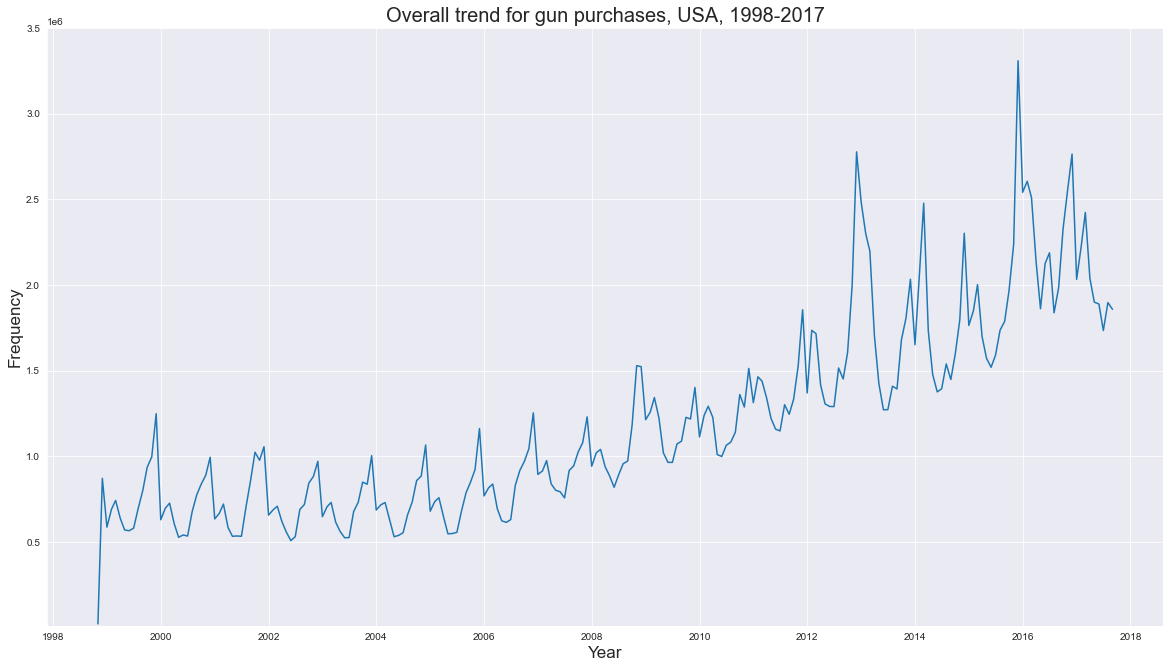

In [66]:
# plotting the results
plt.figure(figsize=(20,11))
plt.plot(monthwise_gun_purchase)
plt.title('Overall trend for gun purchases, USA, 1998-2017',fontsize=20)
plt.ylim(10000,3500000)
plt.xlabel('Year',fontsize=17)
plt.ylabel('Frequency',fontsize=17);


In [67]:
monthwise_gun_purchase.iplot(title='Overall trend for gun purchases, USA, 1998-2017',
    xTitle='Year',
    yTitle='Frequency')

**There is flutuant increase over the years, 2016 was the year where purchases were at peak after it dropped to 1857226 in 2017**

### What states have the maximum gun purchases in the decade of 2000-2010?
   >**Ans** As all states have different laws for firearms so all states will have differnt numbers for gun purchases. To get exact results, the visuzaliaztion is obtained by filtering month column for 2000-2010 time period(i.e. From Jan 2000 till Dec 2010)

In [68]:
temp2 = copy_gun[['month','state','totals']]
temp2.head()

,month,state,totals
0,2017-09-01,Alabama,32019
1,2017-09-01,Alaska,6303
2,2017-09-01,Arizona,28394
3,2017-09-01,Arkansas,17747
4,2017-09-01,California,123506


In [69]:
states_2000 = temp2.query('month == "2000-01-01"')
states_2000.head()

,month,state,totals
11660,2000-01-01,Alabama,17860
11661,2000-01-01,Alaska,2149
11662,2000-01-01,Arizona,12192
11663,2000-01-01,Arkansas,12592
11664,2000-01-01,California,57800


In [70]:
states_2000.describe()

,totals
count,55.000000
mean,11433.690909
std,12216.756489
min,0.000000
25%,2592.000000
50%,8619.000000
75%,14417.500000
max,57800.000000


In [71]:
states_2010 = temp2.query('month == "2010-12-01"')
states_2010.head()

,month,state,totals
4455,2010-12-01,Alabama,43266
4456,2010-12-01,Alaska,7036
4457,2010-12-01,Arizona,23942
4458,2010-12-01,Arkansas,23821
4459,2010-12-01,California,81522


In [72]:
states_2010.describe()

,totals
count,55.000000
mean,27495.727273
std,32589.455477
min,0.000000
25%,7107.000000
50%,19964.000000
75%,36281.500000
max,188188.000000


In [73]:
states_2000_2010 = pd.merge(states_2000,states_2010,how='outer',on='state',indicator=True)
states_2000_2010.head()

,month_x,state,totals_x,month_y,totals_y,_merge
0,2000-01-01,Alabama,17860,2010-12-01,43266,both
1,2000-01-01,Alaska,2149,2010-12-01,7036,both
2,2000-01-01,Arizona,12192,2010-12-01,23942,both
3,2000-01-01,Arkansas,12592,2010-12-01,23821,both
4,2000-01-01,California,57800,2010-12-01,81522,both


In [74]:
sorted_y = states_2000_2010.sort_values(by='totals_y',ascending=False)[:10]
sorted_y

,month_x,state,totals_x,month_y,totals_y,_merge
18,2000-01-01,Kentucky,17459,2010-12-01,188188,both
46,2000-01-01,Texas,48626,2010-12-01,126861,both
4,2000-01-01,California,57800,2010-12-01,81522,both
14,2000-01-01,Illinois,39273,2010-12-01,69260,both
9,2000-01-01,Florida,21069,2010-12-01,65408,both
40,2000-01-01,Pennsylvania,35120,2010-12-01,63510,both
45,2000-01-01,Tennessee,18928,2010-12-01,51102,both
37,2000-01-01,Ohio,20200,2010-12-01,46461,both
0,2000-01-01,Alabama,17860,2010-12-01,43266,both
10,2000-01-01,Georgia,29933,2010-12-01,41531,both


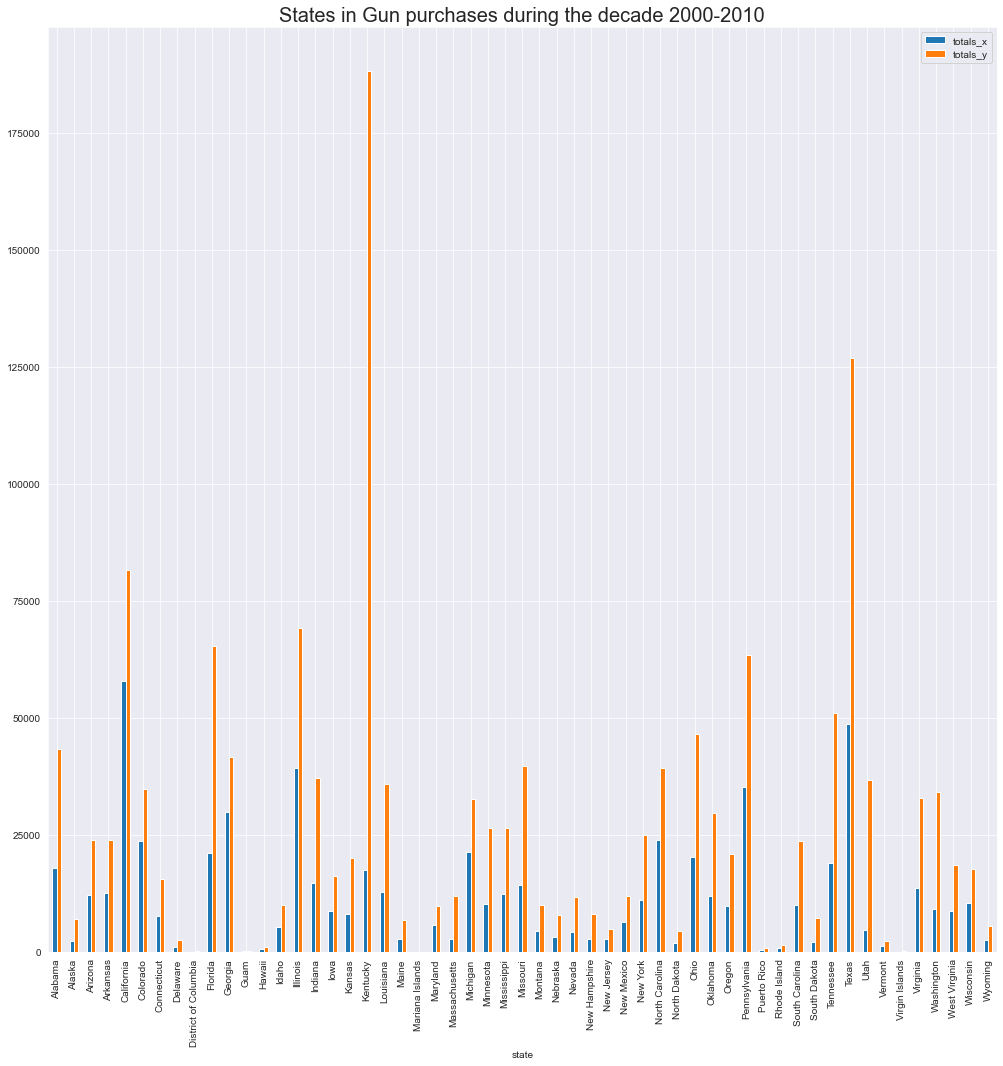

In [75]:
states_2000_2010.plot(x='state',y=['totals_x','totals_y'],kind='bar',figsize=(17,17))
plt.title('States in Gun purchases during the decade 2000-2010',fontsize=20);


In [76]:
states_2000_2010.iplot(x='state',y=['totals_x','totals_y'],
                       kind='bar',title='States in Gun purchases during the decade 2000-2010')



In [77]:
diff = sorted_y.query('state == "Kentucky"')['totals_y'] - sorted_y.query('state == "Kentucky"')['totals_x']
print('Percent increase in Kentucky is:',(diff/sorted_y.query('state == "Kentucky"')['totals_x'])*100)

Percent increase in Kentucky is: 18    977.885331
dtype: float64


**From the bar chart, Kentucky become the top state with highest increase in the decade of 2000-2010. The calculation for percent incresease came to be as ~978% rise in gun purchases.**

<a id='conclusions'></a>
## Conclusions

> **It is cleadr from Insight 1's line chart the increase is noteworthy from 1998. This encouraged to look upon decade gun ppurhcases data. As a result, in the decade of 2000-2010(Insight-2) Kentucky  recorded the maximum gun purchases which raises the question what could be the reason for overall downfall for gun purchasses after 2016. A further analysis could lead to a consensus.**



# References used:
   > • https://stackoverflow.com/questions/16396903/delete-the-first-three-rows-of-a-dataframe-in-pandas                                    
   > • https://stackoverflow.com/questions/15891038/change-data-type-of-columns-in-pandas      
   > • https://stackoverflow.com/questions/58770037/how-can-you-call-a-second-function-while-using-a-lambda-function-in-an-apply                             
   > • https://stackoverflow.com/questions/20868394/changing-a-specific-column-name-in-pandas-dataframe                                             
   > • https://datascience.stackexchange.com/questions/33053/how-do-i-compare-columns-in-different-data-frames                                                  
   > • https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values/17071908#17071908                                            
